In [1]:
import pandas as pd
import numpy as npr
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
from langdetect import detect_langs
from langdetect import DetectorFactory

%matplotlib inline

In [2]:
# Definimos un seed para tener un resultado homogeneo. 
DetectorFactory.seed = 0

In [3]:
detect_langs("Hello. My name is Brain")

[en:0.9999974236121193]

In [4]:
detect("Otec matka syn.")

'pl'

In [5]:
path = '../../data/twitter/train.csv'
tweets = pd.read_csv(path,dtype={'target':'int'})


In [6]:
tweets.sample(10)

,id,keyword,location,text,target
4919,7006,mayhem,"Boston, MA",@alexbelloli I do It just seemed like the page...,0
6349,9079,structural%20failure,NaN,Photo: Failure in structural integrity affects...,0
2002,2878,damage,"New Haven, Connecticut",@JoeDawg42 TOR for a TOR situation only. Wind ...,1
2302,3302,demolish,Bagalkote Karnataka,#charminar demolish if it in falling state any...,0
1092,1577,bomb,"Des Moines, IA",E-Hutch is da bomb ?? http://t.co/aqmpxzo3V1,0
4321,6135,hijack,Houston TX,Tension In Bayelsa As Patience Jonathan Plans ...,1
579,837,bioterror,"Silver Spring, MD",.@APHL responds: FedEx no longer to transport ...,1
3813,5417,first%20responders,WorldWide,Loved the way this book was written to include...,0
6860,9832,trauma,"Little Rock, AR",@thetimepast @saalon I have childhood trauma m...,0
3875,5509,flames,Bacon,He better than Sean bro. I can admit that Sean...,0


def translateTargetValue(x):
    if x=='1':
        return True
    elif x=='0':
        return False
    return  x=='1'
   

print(translateTargetValue('1'))

In [7]:
tweets.rename(columns={'target':'veracity'},inplace=True)

In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   veracity  7613 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 267.8+ KB


tweets['veracity'] = tweets['veracity'].apply(lambda x : bool(x))

tweets[tweets['veracity']]

tweets[not tweets['veracity']].count()

In [9]:
tweets['lan'] = tweets.text.apply(lambda x :detect(x))

In [10]:
tweets.lan.value_counts()

en    7310
de      58
ca      25
it      21
da      20
af      19
sv      19
no      19
fr      17
et      14
nl      14
tl      10
sl       9
id       9
cy       8
ro       7
es       6
vi       5
pl       4
so       4
pt       3
fi       3
sw       2
sq       2
tr       2
hr       2
sk       1
Name: lan, dtype: int64

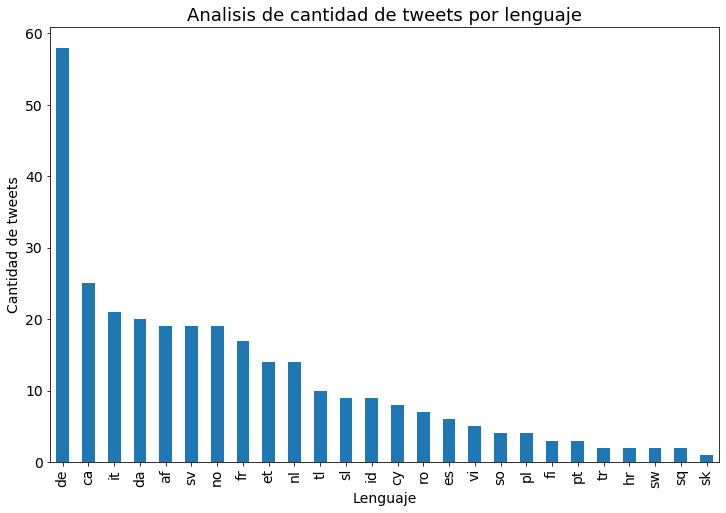

In [11]:
tweets[tweets['lan'] != 'en'].lan.value_counts().plot(kind='bar',title='',linewidth=1,figsize=(12,8),fontsize=14)

ax=plt.gca()
ax.set_title('Analisis de cantidad de tweets por lenguaje',fontsize=18)
ax.set_ylabel('Cantidad de tweets',fontsize=14);
ax.set_xlabel('Lenguaje',fontsize=14);

In [12]:
tweets[tweets['lan'] != 'en'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 16 to 7530
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        303 non-null    int64 
 1   keyword   295 non-null    object
 2   location  188 non-null    object
 3   text      303 non-null    object
 4   veracity  303 non-null    int32 
 5   lan       303 non-null    object
dtypes: int32(1), int64(1), object(4)
memory usage: 15.4+ KB


### Existe una poca cantidad de tweets que no se puede determinar con exactitud el idioma, esos los quitamos para limpiar el set de datos.

In [13]:
en_tweets = tweets[tweets['lan'] == 'en']

In [14]:
en_tweets.count()

id          7310
keyword     7257
location    4892
text        7310
veracity    7310
lan         7310
dtype: int64

In [15]:
pd.options.display.max_colwidth = 150

In [16]:
en_tweets[en_tweets.keyword.isnull()].count()

id          53
keyword      0
location     0
text        53
veracity    53
lan         53
dtype: int64

en_tweets = en_tweets[en_tweets.keyword.notnull()]

Otra menera de encontrar los null
tweets.loc[tweets.keyword.isnull(),'keyword']

len(tweets.location.unique())

In [17]:
en_tweets_with_keyword = en_tweets.dropna(subset=['keyword'])

In [18]:
en_tweets_with_keyword.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7257 entries, 31 to 7582
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7257 non-null   int64 
 1   keyword   7257 non-null   object
 2   location  4892 non-null   object
 3   text      7257 non-null   object
 4   veracity  7257 non-null   int32 
 5   lan       7257 non-null   object
dtypes: int32(1), int64(1), object(4)
memory usage: 368.5+ KB


def cond(x,y):
    return True if (x in y) else False 

serie = [tweets_with_keyword.keyword,tweets_with_keyword.text]



serie = np.where(cond, tweets_with_keyword.keyword, tweets_with_keyword.text)
serie = np.select(cond, {tweets_with_keyword.keyword, tweets_with_keyword.text}, default=np.nan)

In [19]:
en_tweets_with_keyword['contains_keyword'] = en_tweets_with_keyword\
    .apply(lambda x: int(x.keyword.lower() in x.text.lower()), axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
en_tweets_with_keyword.sample(5)

,id,keyword,location,text,veracity,lan,contains_keyword
2289,3284,demolish,London,Imagine having KP AND Root.... We'd demolish everyone,0,en,1
1332,1924,burning%20buildings,"St Charles, MD",I'm mentally preparing myself for a bomb ass school year if it's not I'm burning buildings ??,0,en,0
4407,6265,hijacking,tokyo,#hot Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/gexHzU1VK8 #prebreak #best,0,en,1
6924,9932,trouble,"Rochester Hills, MI",Live updates: Boyd gets out of trouble in 5th http://t.co/3ugfpwMY2x via @detroitnews,0,en,1
1958,2820,cyclone,NaN,GREAT CONDITION Easton Cyclone Softball Bat Fastpitch (-9) 29/20 SK398 http://t.co/rA2mAjPkq2 http://t.co/y7gHHYK05b,1,en,1


tweets_with_keyword[['keyword','text']].sample(20)

In [21]:
en_tweets_with_keyword.contains_keyword.value_counts()

1    5754
0    1503
Name: contains_keyword, dtype: int64

tweets_with_keyword[tweets_with_keyword['contains_keyword'] == False][['keyword','text']]

tweets_with_keyword.contains_keyword

tweets_with_keyword.veracity

tweets_with_keyword[['veracity','contains_keyword']].corr()

tweets_with_keyword['esto'] = serie

tweets_with_keyword.sample(20)


tweets_with_keyword['text']

tweets_with_keyword['contains_keyword'] = tweets_with_keyword['keyword'] in tweets_with_keyword['text']

tweets[tweets.keyword.isnull()]

tweets['contain_keyword'] = tweets[str(tweets.keyword) in str(tweets.text)]

In [22]:
tweets_by_lan = tweets[tweets['lan']!='en'].groupby(['lan']).agg({'lan':['size']})

In [23]:
tweets_by_lan.T

,lan,af,ca,cy,da,de,es,et,fi,fr,hr,...,ro,sk,sl,so,sq,sv,sw,tl,tr,vi
lan,size,19,25,8,20,58,6,14,3,17,2,...,7,1,9,4,2,19,2,10,2,5


level0 = tweets_by_lan.columns.get_level_values(0)

level1 = tweets_by_lan.columns.get_level_values(1)

tweets_by_lan.columns = level0 + '_' + level1

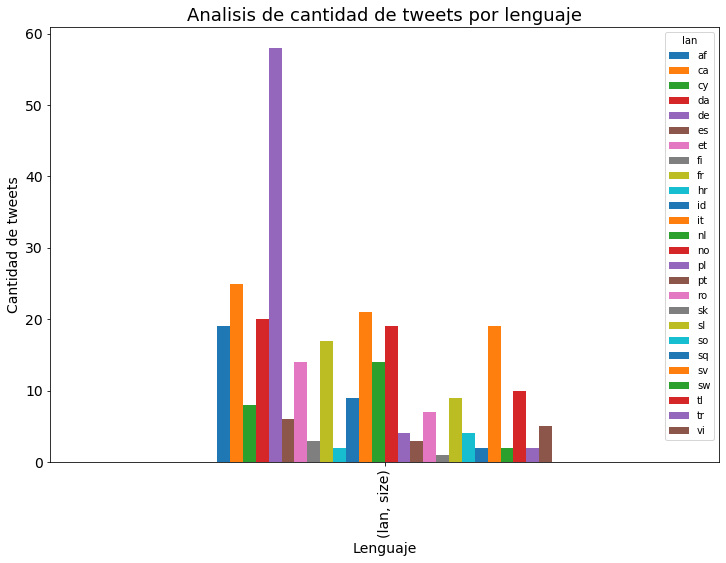

In [24]:
tweets_by_lan.T.plot(kind='bar',title='',linewidth=1,figsize=(12,8),fontsize=14)

ax=plt.gca()
ax.set_title('Analisis de cantidad de tweets por lenguaje',fontsize=18)
ax.set_ylabel('Cantidad de tweets',fontsize=14);
ax.set_xlabel('Lenguaje',fontsize=14);

lan_not_en = (tweets['lan'] == 'en')

real_tweet = tweets['veracity'] == 'Real'

lan_not_en + real_tweet

tweets[tweets.lan != 'en'][tweets.veracity == 'Real']

## Analizar tweets con hashtag '#' menciones '@' links 'http'

In [25]:
int('http' in "https://hasdkja")

1

In [26]:
def containHashtag(text) :
    return '#' in text

In [27]:
en_tweets_with_keyword['hashtag'] = en_tweets_with_keyword.text.apply(lambda x: '#' in x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
en_tweets_with_keyword.groupby(['hashtag']).agg({'hashtag':['size']})

,hashtag
,size
hashtag,
False,5554
True,1703


In [29]:
en_tweets_with_keyword['link'] = en_tweets_with_keyword.text.apply(lambda x: 'http' in x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


tweets_with_keyword.text.apply(lambda x: 'http' in x)

In [30]:
en_tweets_with_keyword.groupby(['link']).agg({'veracity':['size']})

,veracity
,size
link,
False,3442
True,3815


In [31]:
en_tweets_with_keyword['arroba'] = en_tweets_with_keyword.text.apply(lambda x: '@' in x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
en_tweets_with_keyword.groupby(['arroba']).agg({'arroba':['size']})

,arroba
,size
arroba,
False,5321
True,1936


In [33]:
def containAnyReference(text):
    return '@' in text or '#' in text or 'http' in text

In [34]:
containAnyReference("Buenas tardes CoachCMorales")

False

In [35]:
containAnyReference("Buenas tardes @CoachCMorales")

True

In [36]:
containAnyReference("Buenas tardes https://tw.sample")

True

In [37]:
containAnyReference("Buenas tardes #Shini")

True

In [38]:
containAnyReference("Buenas tardes @CoachCMorales https://tw.sample #Shini")

True

In [39]:
en_tweets_with_keyword['any_reference'] = en_tweets_with_keyword.text.apply(lambda x: containAnyReference(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
en_tweets_with_keyword.groupby(['any_reference']).agg({'any_reference':['size']})

,any_reference
,size
any_reference,
False,1737
True,5520


In [41]:
def containAllReference(text):
    return '@' in text and '#' in text and 'http' in text

In [42]:
containAllReference("Buenas tardes CoachCMorales")

False

In [43]:
containAllReference("Buenas tardes @CoachCMorales")

False

In [44]:
containAllReference("Buenas tardes https://tw.sample")

False

In [45]:
containAllReference("Buenas tardes #Shini")

False

In [46]:
containAllReference("Buenas tardes @CoachCMorales https://tw.sample #Shini")

True

In [47]:
en_tweets_with_keyword['all_reference'] = en_tweets_with_keyword.text.apply(lambda x: containAllReference(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
en_tweets_with_keyword.groupby(['all_reference']).agg({'all_reference':['size']})

,all_reference
,size
all_reference,
False,7057
True,200


In [49]:
en_tweets_with_keyword[en_tweets_with_keyword['veracity'] & en_tweets_with_keyword['all_reference']].count()

id                  81
keyword             81
location            58
text                81
veracity            81
lan                 81
contains_keyword    81
hashtag             81
link                81
arroba              81
any_reference       81
all_reference       81
dtype: int64

In [50]:
en_tweets_with_keyword[en_tweets_with_keyword['veracity'] & en_tweets_with_keyword['link']].count()

id                  2100
keyword             2100
location            1435
text                2100
veracity            2100
lan                 2100
contains_keyword    2100
hashtag             2100
link                2100
arroba              2100
any_reference       2100
all_reference       2100
dtype: int64

In [51]:
en_tweets_with_keyword[en_tweets_with_keyword['veracity'] & en_tweets_with_keyword['arroba']].count()

id                  654
keyword             654
location            471
text                654
veracity            654
lan                 654
contains_keyword    654
hashtag             654
link                654
arroba              654
any_reference       654
all_reference       654
dtype: int64

In [52]:
en_tweets_with_keyword[en_tweets_with_keyword['veracity'] & en_tweets_with_keyword['hashtag']].count()

id                  839
keyword             839
location            591
text                839
veracity            839
lan                 839
contains_keyword    839
hashtag             839
link                839
arroba              839
any_reference       839
all_reference       839
dtype: int64

en_tweets_with_keyword[tweets_with_keyword['veracity'] & en_tweets_with_keyword['any_reference']].count()

In [53]:
en_tweets_with_keyword.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7257 entries, 31 to 7582
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                7257 non-null   int64 
 1   keyword           7257 non-null   object
 2   location          4892 non-null   object
 3   text              7257 non-null   object
 4   veracity          7257 non-null   int32 
 5   lan               7257 non-null   object
 6   contains_keyword  7257 non-null   int64 
 7   hashtag           7257 non-null   bool  
 8   link              7257 non-null   bool  
 9   arroba            7257 non-null   bool  
 10  any_reference     7257 non-null   bool  
 11  all_reference     7257 non-null   bool  
dtypes: bool(5), int32(1), int64(2), object(4)
memory usage: 780.6+ KB


In [54]:
len(en_tweets_with_keyword.location.unique())

3222

##### Agregamos una columna con la longitud de los tweets

In [55]:
en_tweets_with_keyword['tweets_length'] = en_tweets_with_keyword['text'].apply(lambda x : len(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
en_tweets_with_keyword.sample(5)

,id,keyword,location,text,veracity,lan,contains_keyword,hashtag,link,arroba,any_reference,all_reference,tweets_length
3567,5098,famine,"Rogersville, MO",@SavageNation Reminds me when the Peasants destroyed their food when Stalin's army came to 'redistribute the wealth'. It caused famine/death,1,en,1,False,False,True,True,False,140
1392,2009,casualties,indiana,That triumphant moment when you cook up two eggs over easy with no yolk casualties ?? http://t.co/fQJ5Aga1pd,0,en,1,False,True,False,True,False,108
1522,2198,catastrophic,Planet Earth,Learning from the Legacy of a Catastrophic Eruption - The New Yorker http://t.co/vMWTOUyOHm,1,en,1,False,True,False,True,False,91
6898,9887,traumatised,NaN,@Jude_Mugabi not that all abortions get you traumatised. At times you are okay with the decision due to reasons like rape,0,en,1,False,False,True,True,False,121
2597,3726,destroyed,Live4Heed??,the way he did me destroyed me...,0,en,1,False,False,False,False,False,34


In [57]:
en_tweets_with_keyword['tweets_length']

31       55
32       67
33       82
34       34
35       76
       ... 
7578     48
7579    107
7580     93
7581    104
7582     80
Name: tweets_length, Length: 7257, dtype: int64

In [58]:
mean_twetts_with_keyword = en_tweets_with_keyword['tweets_length'].mean()

In [59]:
std_tweets_length_keyword = en_tweets_with_keyword['tweets_length'].std()

In [60]:
en_tweets_with_keyword.describe()

,id,veracity,contains_keyword,tweets_length
count,7257.000000,7257.000000,7257.000000,7257.000000
mean,5438.943365,0.433788,0.792890,102.975472
std,3104.870949,0.495631,0.405263,32.357604
min,48.000000,0.000000,0.000000,7.000000
25%,2766.000000,0.000000,1.000000,80.000000
50%,5380.000000,0.000000,1.000000,109.000000
75%,8098.000000,1.000000,1.000000,134.000000
max,10834.000000,1.000000,1.000000,157.000000


In [61]:
en_tweets_with_keyword['tweets_length'] = en_tweets_with_keyword.tweets_length\
        .apply(lambda x : (x - mean_twetts_with_keyword) / std_tweets_length_keyword )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
en_tweets_with_keyword.describe()

,id,veracity,contains_keyword,tweets_length
count,7257.000000,7257.000000,7257.000000,7.257000e+03
mean,5438.943365,0.433788,0.792890,-1.468670e-17
std,3104.870949,0.495631,0.405263,1.000000e+00
min,48.000000,0.000000,0.000000,-2.966087e+00
25%,2766.000000,0.000000,1.000000,-7.100486e-01
50%,5380.000000,0.000000,1.000000,1.861858e-01
75%,8098.000000,1.000000,1.000000,9.588018e-01
max,10834.000000,1.000000,1.000000,1.669608e+00


In [63]:
en_tweets_with_keyword.sample(5)

,id,keyword,location,text,veracity,lan,contains_keyword,hashtag,link,arroba,any_reference,all_reference,tweets_length
5944,8490,screamed,with Doflamingo,//kinda screamed &gt;_&lt; https://t.co/MSUY4qTPk9,0,en,1,False,True,False,True,False,-1.637188
5912,8443,screamed,NaN,I slammed my phone to the ground and then screamed ahahahga,0,en,1,False,False,False,False,False,-1.359046
4281,6084,heat%20wave,"Nebraska, Colorado & The GLOBE",weather warfare Follow the Money This Government Is What Our Founding Fathers Were Warning Us About The Weather... http://t.co/TgtCRU8jiO,1,en,0,False,True,False,True,False,1.051516
4866,6929,mass%20murderer,Fresno,Happy boy to mass murderer http://t.co/xPddWH5teM,1,en,0,False,True,False,True,False,-1.668092
2180,3124,debris,"Hamilton, Ontario Canada",Malaysia seem more certain than France.\n\nPlane debris is from missing MH370 http://t.co/eXZnmxbINJ,1,en,1,False,True,False,True,False,-0.153765


veracity	contains_keyword	hashtag	link	arroba	any_reference	all_reference

In [65]:
en_tweets_with_keyword['veracity'] = en_tweets_with_keyword.veracity.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
en_tweets_with_keyword['contains_keyword'] = en_tweets_with_keyword.contains_keyword.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
en_tweets_with_keyword['hashtag'] = en_tweets_with_keyword.hashtag.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
en_tweets_with_keyword['link'] = en_tweets_with_keyword.link.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
en_tweets_with_keyword['arroba'] = en_tweets_with_keyword.arroba.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
en_tweets_with_keyword['any_reference'] = en_tweets_with_keyword.any_reference.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
en_tweets_with_keyword['all_reference'] = en_tweets_with_keyword.all_reference.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
en_tweets_with_keyword.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7257 entries, 31 to 7582
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7257 non-null   int64  
 1   keyword           7257 non-null   object 
 2   location          4892 non-null   object 
 3   text              7257 non-null   object 
 4   veracity          7257 non-null   int32  
 5   lan               7257 non-null   object 
 6   contains_keyword  7257 non-null   int32  
 7   hashtag           7257 non-null   int32  
 8   link              7257 non-null   int32  
 9   arroba            7257 non-null   int32  
 10  any_reference     7257 non-null   int32  
 11  all_reference     7257 non-null   int32  
 12  tweets_length     7257 non-null   float64
dtypes: float64(1), int32(7), int64(1), object(4)
memory usage: 915.3+ KB


In [74]:
en_tweets_with_keyword.describe()

,id,veracity,contains_keyword,hashtag,link,arroba,any_reference,all_reference,tweets_length
count,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7.257000e+03
mean,5438.943365,0.433788,0.792890,0.234670,0.525699,0.266777,0.760645,0.027560,-1.468670e-17
std,3104.870949,0.495631,0.405263,0.423822,0.499374,0.442305,0.426719,0.163719,1.000000e+00
min,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.966087e+00
25%,2766.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-7.100486e-01
50%,5380.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.861858e-01
75%,8098.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,9.588018e-01
max,10834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.669608e+00


In [83]:
numeric_values_tweets = en_tweets_with_keyword[['veracity','contains_keyword','hashtag','link','arroba','any_reference','all_reference','tweets_length']]

In [85]:
numeric_values_tweets.sample(5)

,veracity,contains_keyword,hashtag,link,arroba,any_reference,all_reference,tweets_length
3317,0,1,0,0,0,0,0,-0.215574
7354,1,1,0,1,1,1,0,-0.864572
2952,1,1,0,1,0,1,0,0.896992
346,0,1,1,1,0,1,0,-0.431907
2102,0,1,0,1,0,1,0,-0.184670


In [113]:
plt.colorbar?

In [118]:
import matplotlib.cm as cm

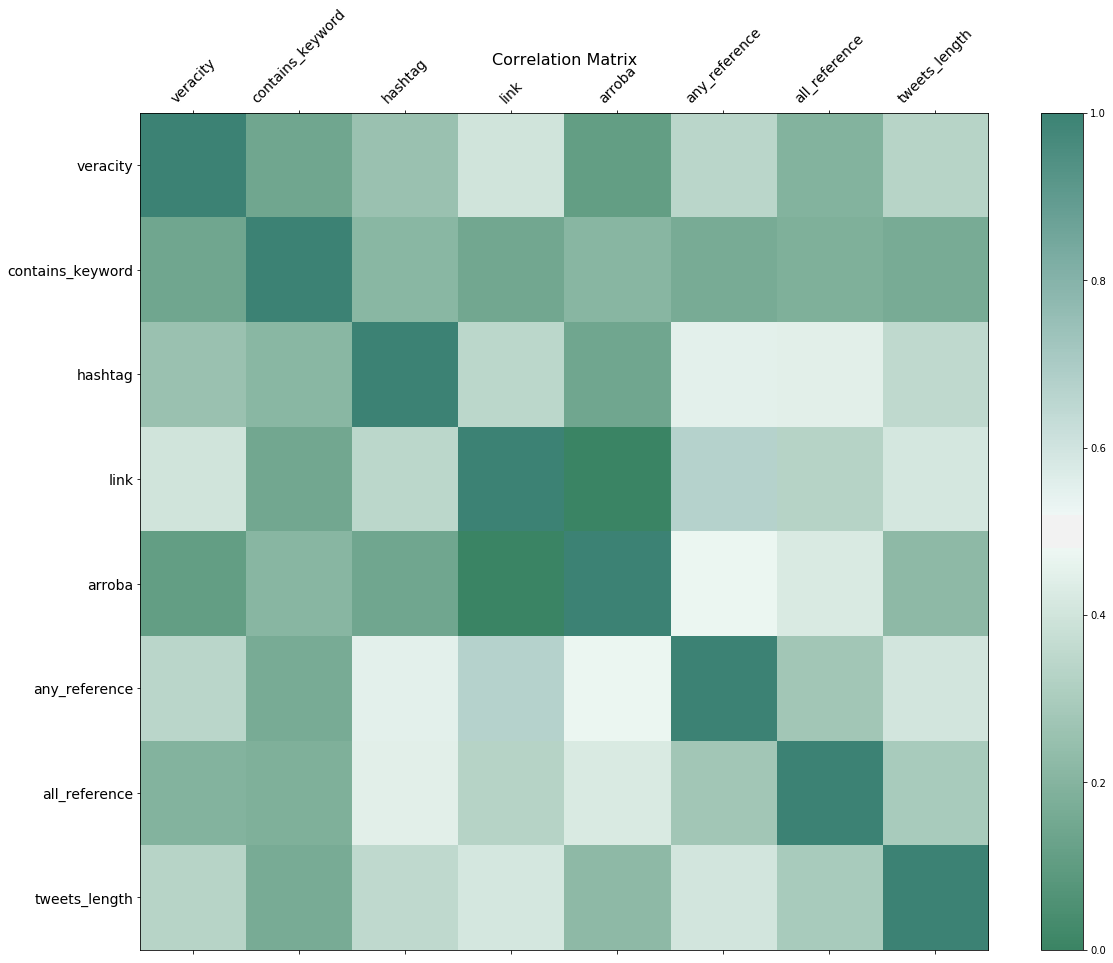

In [144]:
f = plt.figure(figsize=(19, 15))
plt.matshow(numeric_values_tweets.corr(), fignum=f.number)
plt.xticks(range(numeric_values_tweets.shape[1]), numeric_values_tweets.columns, fontsize=14, rotation=45)
plt.yticks(range(numeric_values_tweets.shape[1]), numeric_values_tweets.columns, fontsize=14)
my_cmap2=sns.diverging_palette(150, 170, as_cmap=True)

cb = plt.colorbar(cm.ScalarMappable(cmap=my_cmap2))
plt.imshow(numeric_values_tweets.corr(),aspect='auto',cmap=my_cmap2)                   
plt.title('Correlation Matrix', fontsize=16);
plt.show()


corr.style.background_gradient?

sns.diverging_palette?

In [145]:
corr = en_tweets_with_keyword.corr()
corr.style.background_gradient(cmap=sns.diverging_palette(150,170, as_cmap=True))
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,id,veracity,contains_keyword,hashtag,link,arroba,any_reference,all_reference,tweets_length
id,1.000000,0.055515,0.070673,-0.011398,0.019912,-0.024089,0.010771,-0.031491,0.009043
veracity,0.055515,1.000000,-0.069997,0.065779,0.247842,-0.116815,0.171698,-0.009779,0.163956
contains_keyword,0.070673,-0.069997,1.000000,0.012605,-0.068694,0.005356,-0.046024,-0.021972,-0.046062
hashtag,-0.011398,0.065779,0.012605,1.000000,0.178247,-0.072284,0.310624,0.304019,0.193380
link,0.019912,0.247842,-0.068694,0.178247,1.000000,-0.255045,0.590571,0.159905,0.261796
arroba,-0.024089,-0.116815,0.005356,-0.072284,-0.255045,1.000000,0.338366,0.279093,0.026524
any_reference,0.010771,0.171698,-0.046024,0.310624,0.590571,0.338366,1.000000,0.094436,0.254116
all_reference,-0.031491,-0.009779,-0.021972,0.304019,0.159905,0.279093,0.094436,1.000000,0.116468
tweets_length,0.009043,0.163956,-0.046062,0.193380,0.261796,0.026524,0.254116,0.116468,1.000000


In [145]:
corr = en_tweets_with_keyword.corr()
corr.style.background_gradient(cmap=sns.diverging_palette(150,170, as_cmap=True))
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,id,veracity,contains_keyword,hashtag,link,arroba,any_reference,all_reference,tweets_length
id,1.000000,0.055515,0.070673,-0.011398,0.019912,-0.024089,0.010771,-0.031491,0.009043
veracity,0.055515,1.000000,-0.069997,0.065779,0.247842,-0.116815,0.171698,-0.009779,0.163956
contains_keyword,0.070673,-0.069997,1.000000,0.012605,-0.068694,0.005356,-0.046024,-0.021972,-0.046062
hashtag,-0.011398,0.065779,0.012605,1.000000,0.178247,-0.072284,0.310624,0.304019,0.193380
link,0.019912,0.247842,-0.068694,0.178247,1.000000,-0.255045,0.590571,0.159905,0.261796
arroba,-0.024089,-0.116815,0.005356,-0.072284,-0.255045,1.000000,0.338366,0.279093,0.026524
any_reference,0.010771,0.171698,-0.046024,0.310624,0.590571,0.338366,1.000000,0.094436,0.254116
all_reference,-0.031491,-0.009779,-0.021972,0.304019,0.159905,0.279093,0.094436,1.000000,0.116468
tweets_length,0.009043,0.163956,-0.046062,0.193380,0.261796,0.026524,0.254116,0.116468,1.000000
